In [7]:
import bools
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [8]:
functions = [(func, getattr(bools, func)) for func in dir(bools) if callable(getattr(bools, func)) and not func.startswith("_")]

functions

[('a_and_not_b', <function bools.a_and_not_b(a, b)>),
 ('a_or_not_b', <function bools.a_or_not_b(a, b)>),
 ('a_xor_not_b', <function bools.a_xor_not_b(a, b)>),
 ('and_', <function bools.and_(a, b)>),
 ('b_and_not_a', <function bools.b_and_not_a(a, b)>),
 ('b_or_not_a', <function bools.b_or_not_a(a, b)>),
 ('b_xor_not_a', <function bools.b_xor_not_a(a, b)>),
 ('equiv', <function bools.equiv(a, b)>),
 ('false_', <function bools.false_(a, b)>),
 ('implies', <function bools.implies(a, b)>),
 ('nand', <function bools.nand(a, b)>),
 ('nor', <function bools.nor(a, b)>),
 ('not_a', <function bools.not_a(a, b)>),
 ('not_b', <function bools.not_b(a, b)>),
 ('or_', <function bools.or_(a, b)>),
 ('xnor', <function bools.xnor(a, b)>),
 ('xor', <function bools.xor(a, b)>)]

In [9]:
classifiers = [
    ("Perceptron", Perceptron(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=0)),
    ("KNN", KNeighborsClassifier(n_neighbors=2)),
    ("SVM", svm.SVC())
]

In [10]:
n = 10
x = np.random.choice([0, 1], size=(n, 2))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

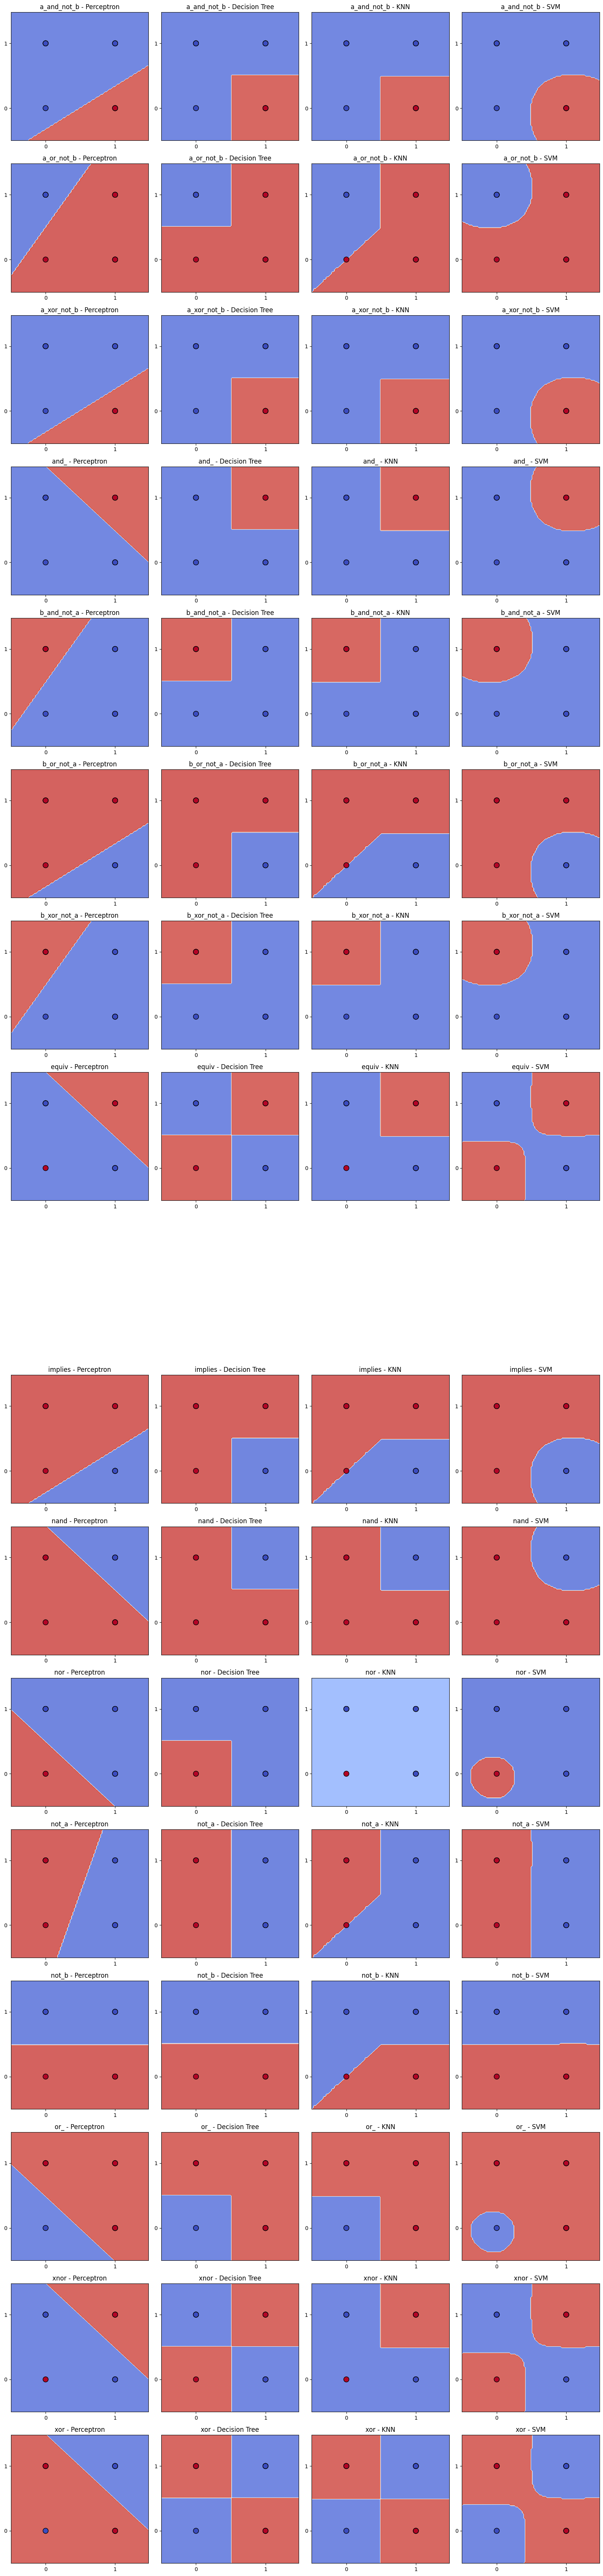

In [11]:
fig, axes = plt.subplots(len(functions), len(classifiers), figsize=(16, 4 * len(functions)))
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for row_idx, (func_name, function_) in enumerate(functions):
    y = np.array([function_(*pair) for pair in x]).astype(int)

    if len(np.unique(y)) < 2:
        for col_idx in range(len(classifiers)):
            axes[row_idx, col_idx].set_visible(False)
        continue

    for col_idx, (clf_name, clf_orig) in enumerate(classifiers):
        clf_orig.fit(x, y)
        Z = clf_orig.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax = axes[row_idx, col_idx]
        ax.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.8) 
        ax.scatter(x[:, 0], x[:, 1], c=y, cmap="coolwarm", edgecolor='k', s=100)
        ax.set_xticks([0, 1])
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_title(f"{func_name} - {clf_name}")

plt.tight_layout()
plt.show()